In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
Dtrain = pd.read_csv("TrainingSet (OR - 7).csv")
#Dtrain = Dtrain.iloc[:,0:4].values
Dtest = pd.read_csv("TestingSet (OR - 7).csv")

In [3]:
Dtrain["Bearing"].value_counts()

Normal                 96896
Outer Race (0.007")    96896
Name: Bearing, dtype: int64

In [4]:
Dtrain["Bearing"].value_counts(normalize=True)*100

Normal                 50.0
Outer Race (0.007")    50.0
Name: Bearing, dtype: float64

In [5]:
Dtest.columns

Index(['Bearing', 'Fault Diameter', 'DE', 'FE'], dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_train = LabelEncoder()
Dtrain["Bearing"] = labelencoder_train.fit_transform(Dtrain["Bearing"])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
Dtrain = ct.fit_transform(Dtrain)

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_train = LabelEncoder()
Dtest["Bearing"] = labelencoder_train.fit_transform(Dtest["Bearing"])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
Dtest = ct.fit_transform(Dtest)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(Dtrain))
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(Dtest))



In [9]:
from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers

Using TensorFlow backend.


In [10]:
import tensorflow as tf
from numpy.random import seed
seed(10)
tf.random.set_seed(10)
act_func = 'elu'

In [11]:
# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(6,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(6,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'] )

# Train model for 100 epochs, batch size of 10: 
NUM_EPOCHS=100
BATCH_SIZE=100

In [12]:
history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1)

Train on 184102 samples, validate on 9690 samples
Epoch 1/100
184102/184102 [==============================] - 8s 44us/step - loss: 0.0483 - accuracy: 0.7042 - val_loss: 0.0043 - val_accuracy: 0.5140
Epoch 2/100
184102/184102 [==============================] - 7s 37us/step - loss: 0.0020 - accuracy: 0.7688 - val_loss: 0.0038 - val_accuracy: 0.5473
Epoch 3/100
184102/184102 [==============================] - 7s 37us/step - loss: 0.0016 - accuracy: 0.7938 - val_loss: 0.0023 - val_accuracy: 0.5777
Epoch 4/100
184102/184102 [==============================] - 7s 37us/step - loss: 6.5034e-04 - accuracy: 0.8451 - val_loss: 3.7281e-04 - val_accuracy: 0.6220
Epoch 5/100
184102/184102 [==============================] - 7s 37us/step - loss: 1.5664e-04 - accuracy: 0.7933 - val_loss: 6.1849e-05 - val_accuracy: 0.5528
Epoch 6/100
184102/184102 [==============================] - 7s 38us/step - loss: 8.4415e-05 - accuracy: 0.8034 - val_loss: 3.5404e-05 - val_accuracy: 0.4356
Epoch 7/100
184102/184102 

184102/184102 [==============================] - 7s 36us/step - loss: 6.9085e-06 - accuracy: 0.8143 - val_loss: 1.9780e-06 - val_accuracy: 0.8386
Epoch 53/100
184102/184102 [==============================] - 7s 37us/step - loss: 6.8290e-06 - accuracy: 0.8165 - val_loss: 2.1612e-06 - val_accuracy: 0.6154
Epoch 54/100
184102/184102 [==============================] - 7s 36us/step - loss: 6.6983e-06 - accuracy: 0.8165 - val_loss: 9.9823e-06 - val_accuracy: 0.7084
Epoch 55/100
184102/184102 [==============================] - 7s 36us/step - loss: 6.4817e-06 - accuracy: 0.8180 - val_loss: 1.7248e-06 - val_accuracy: 0.3916
Epoch 56/100
184102/184102 [==============================] - 7s 37us/step - loss: 6.4052e-06 - accuracy: 0.8198 - val_loss: 3.2168e-06 - val_accuracy: 0.7963
Epoch 57/100
184102/184102 [==============================] - 7s 37us/step - loss: 6.2670e-06 - accuracy: 0.8216 - val_loss: 3.2176e-06 - val_accuracy: 0.7183
Epoch 58/100
184102/184102 [==============================]

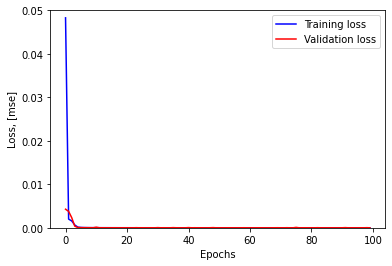

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.05])
plt.show()

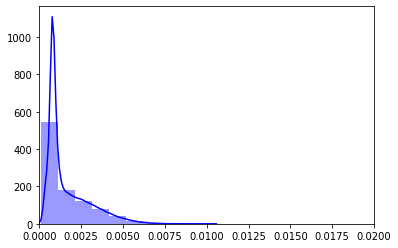

In [14]:
X_pred = model.predict(np.array(X_train))

import seaborn as sns

scored = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sns.distplot(scored, bins = 10, kde= True, color = 'blue');
plt.xlim([0.0,.02])
plt.show()

In [15]:
X_pred = model.predict(np.array(X_test))

scored = pd.DataFrame()
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = 0.0075
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.sample(100)

,Loss_mae,Threshold,Anomaly
13002,0.000702,0.0075,False
22845,0.002828,0.0075,False
10961,0.001027,0.0075,False
15502,0.002620,0.0075,False
40374,0.000881,0.0075,False
...,...,...,...
41453,0.000838,0.0075,False
13961,0.002547,0.0075,False
23069,0.001197,0.0075,False
40604,0.000962,0.0075,False


In [16]:
X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train)

scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = 0.0075
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

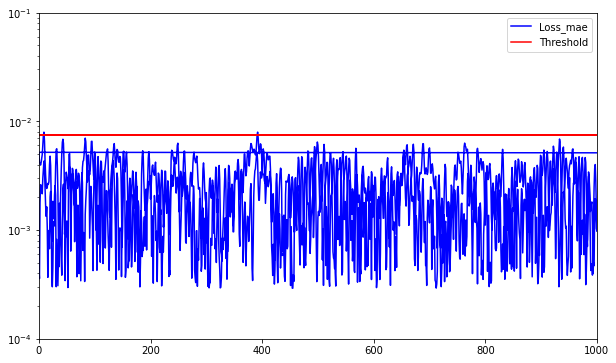

In [17]:
scored.plot(logy=True,  figsize = (10,6), xlim =[0,1000], ylim = [1e-4,1e-1], color = ['blue','red'])

In [18]:
scored_train['Loss_mae'].mean()

0.0016400653409950666

In [19]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.000439,0.0075,False
1,0.000358,0.0075,False
2,0.001786,0.0075,False
3,0.002613,0.0075,False
4,0.002574,0.0075,False
...,...,...,...
193787,0.000709,0.0075,False
193788,0.000812,0.0075,False
193789,0.000875,0.0075,False
193790,0.000767,0.0075,False


In [20]:
scored_train[scored_train['Anomaly'] == True]

,Loss_mae,Threshold,Anomaly
2234,0.008382,0.0075,True
2235,0.008715,0.0075,True
2236,0.007596,0.0075,True
3023,0.008223,0.0075,True
3024,0.007716,0.0075,True
...,...,...,...
95152,0.007579,0.0075,True
95294,0.008113,0.0075,True
95295,0.008474,0.0075,True
96117,0.008274,0.0075,True
